In [37]:
import pandas as pd

train_data = pd.read_csv('loantrain.csv')
test_data = pd.read_csv('loantest.csv')

print("Train Dataset:")
print(train_data.head())
print(train_data.info())

print("\nTest Dataset:")
print(test_data.head())
print(test_data.info())
print("Train Dataset - Missing Values:")
print(train_data.isnull().sum())

print("\nTest Dataset - Missing Values:")
print(test_data.isnull().sum())
from sklearn.impute import SimpleImputer

numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

X_train = train_data.drop('Loan_Status', axis=1)
y_train = train_data['Loan_Status']
X_test = test_data

if 'Loan_ID' in X_test.columns:
    X_test = X_test.drop('Loan_ID', axis=1)

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_train, X_test = X_train.align(X_test, join='left', axis=1)

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

Train Dataset:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2    

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [60]:
X = train_data.drop('Loan_Status', axis=1)
y = train_data['Loan_Status']

X_test = test_data

if 'Loan_ID' in X_test.columns:
    X_test = X_test.drop('Loan_ID', axis=1)

numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
numerical_transformer = SimpleImputer(strategy='mean', missing_values=np.nan)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('onehot', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

Model: Logistic Regression
Accuracy: 0.7805
Classification Report:
              precision    recall  f1-score   support

           N       0.90      0.42      0.57        43
           Y       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123


Model: Decision Tree
Accuracy: 0.7154
Classification Report:
              precision    recall  f1-score   support

           N       0.60      0.56      0.58        43
           Y       0.77      0.80      0.79        80

    accuracy                           0.72       123
   macro avg       0.69      0.68      0.68       123
weighted avg       0.71      0.72      0.71       123


Model: Random Forest
Accuracy: 0.7805
Classification Report:
              precision    recall  f1-score   support

           N       0.90      0.42      0.57        43
           Y       0.76      0.97      0.85   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: SVM
Accuracy: 0.6504
Classification Report:
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        43
           Y       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123


Model: Gradient Boosting
Accuracy: 0.7724
Classification Report:
              precision    recall  f1-score   support

           N       0.86      0.42      0.56        43
           Y       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123




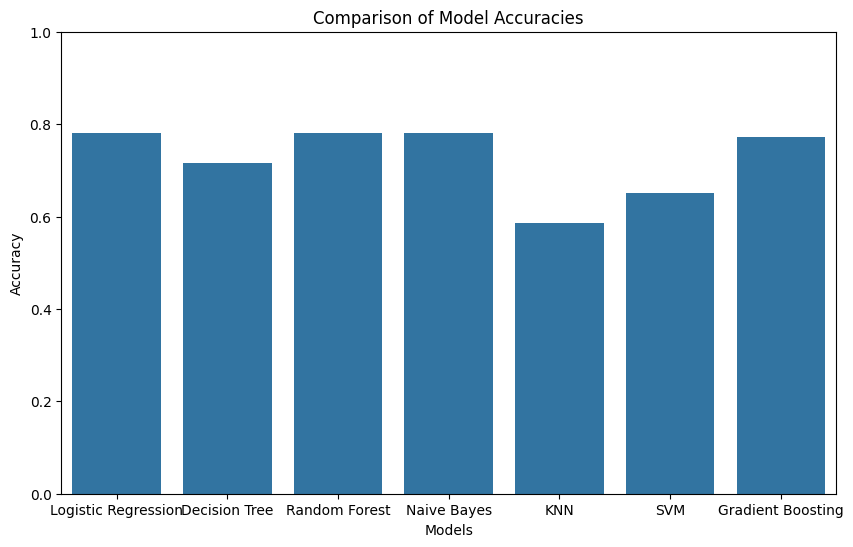

In [65]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}\n")

accuracies = {}
for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    accuracies[name] = accuracy

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0.0, 1.0])
plt.show()

In [ ]:
#Logistic Regression, Random forest, amd Naive Bayes have the highest accuracy =0.7805